In [115]:
from sklearn.datasets import load_digits
import pandas as pd

In [116]:
digits = load_digits()

In [117]:
print('Image Data Shape:', digits.data.shape)
print('Label Data Shape:', digits.target.shape)
print('Digit Category Labels:', digits.target_names)

Image Data Shape: (1797, 64)
Label Data Shape: (1797,)
Digit Category Labels: [0 1 2 3 4 5 6 7 8 9]


In [118]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [119]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, '1')

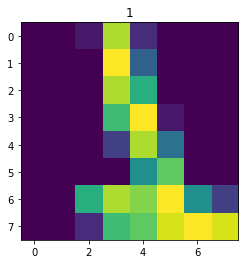

In [120]:
plt.imshow(digits.images[1000])
plt.title(digits.target[1000])

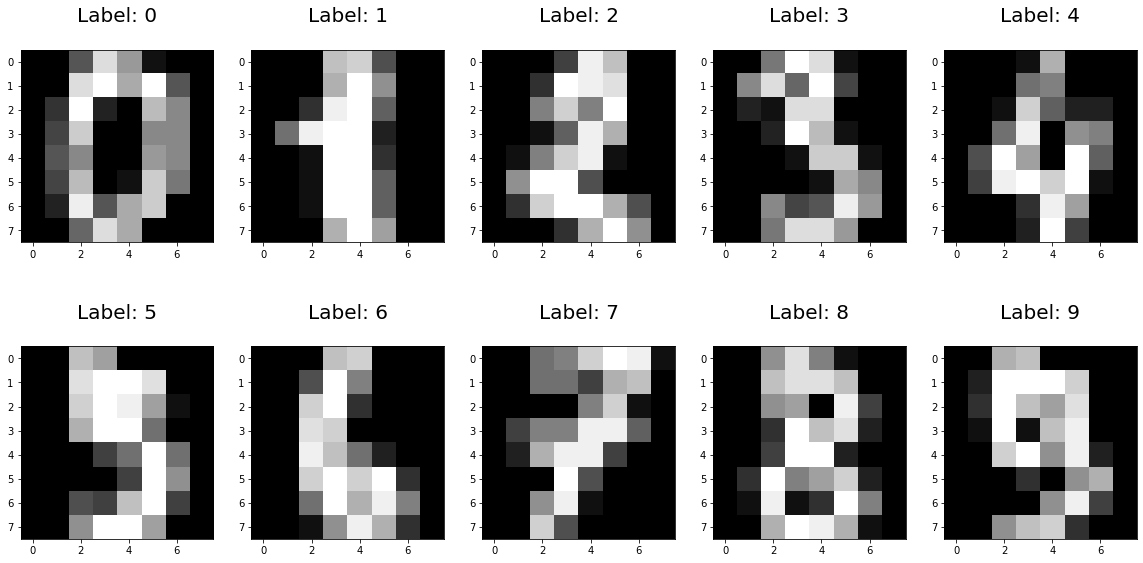

In [121]:
plt.figure(figsize=(20,10))
for index, (image, label) in enumerate(zip(digits.data[0:10],
digits.target[0:10])):
    plt.subplot(2, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Label: %i\n' % label, fontsize = 20)

In [122]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data,
digits.target, test_size=0.5, random_state=0)

In [123]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [124]:
logisticRegr.fit(x_train, y_train)

/home/zak/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/zak/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [125]:
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [126]:
y_pred = logisticRegr.predict(x_test)

In [127]:
test = y_test == y_pred
test_dic = {}

for i in test:
    if i in test_dic:
        test_dic[i] += 1
    else:
        test_dic[i] = 1

In [128]:
test_dic[True] / (test_dic[True] + test_dic[False])

0.9443826473859844

In [129]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9443826473859844


In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [131]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[ 89   0   0   0   0   0   0   0   0   0]
 [  0  87   0   0   0   1   1   0   1   0]
 [  0   3  87   2   0   0   0   0   0   0]
 [  0   0   1  87   0   0   0   0   3   2]
 [  0   3   0   0  72   0   0   1   0   0]
 [  0   1   0   0   0 101   3   0   0   3]
 [  0   1   0   0   1   0  87   0   0   0]
 [  0   1   0   0   1   0   0  76   0   0]
 [  0   4   1   3   1   0   2   0  76   5]
 [  0   1   0   1   1   2   0   0   0  87]]


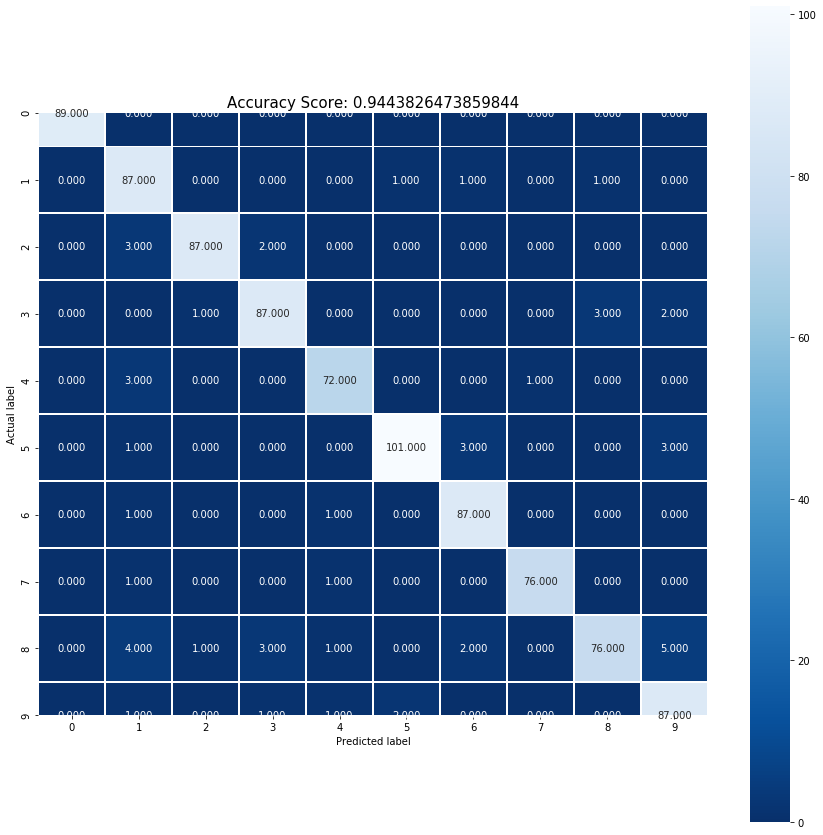

In [132]:
plt.figure(figsize=(15,15))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True,
cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## Digit Recognition Using Linear Regression

In [133]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [134]:
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [135]:
y_linpred = np.around(linreg.predict(x_test))
y_linpred[0:10]

array([2., 8., 2., 6., 4., 5., 2., 6., 8., 6.])

In [136]:
y_test[0:10]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [137]:
linreg.score(x_test, y_test)

0.5374701892921692

In [138]:
test2 = y_test == y_linpred
test2_dic = {}

for i in test2:
    if i in test2_dic:
        test2_dic[i] += 1
    else:
        test2_dic[i] = 1

In [139]:
test2_dic

{True: 187, False: 712}

In [143]:
print('Real percentage of accurate classification:', test2_dic[True] / (test2_dic[True] + test2_dic[False]))

Real percentage of accurate classification: 0.20800889877641823
